# Netflix Catalog Analysis

## Project Overview
This project analyzes the Netflix catalog to uncover insights about content distribution, trends over time, popular genres, ratings, and key contributors (actors/directors).  
The goal is to explore the dataset and present findings visually, demonstrating skills in data cleaning, feature engineering, and exploratory data analysis (EDA) with Python.

## Dataset
- **Source:** [Netflix Titles Dataset - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- **Original shape:** ~8,800 rows × 12 columns
- **Description:** Contains details of movies and TV shows available on Netflix, including type, title, director, cast, country, date added, release year, rating, duration, and genre(s).

## Key Steps
1. Data cleaning and preprocessing
2. Feature engineering (e.g., extracting year/month from date added, parsing duration)
3. Exploratory data analysis (EDA)
4. Visualization of trends and patterns
5. Insights summary

## Timeline Insights

- Content in this dataset was originally released between **<1925>** and **<2021>**.
- Titles were added to Netflix between **<2008>** and **<2021>**.
- The sharp increase in additions after <2015> aligns with Netflix's expansion into global markets and original content.


## Technologies Used
- Python (`pandas`, `numpy`, `matplotlib`, `seaborn`)
- Jupyter Notebook
  
---


In [98]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

In [100]:
#Make plots look nicer

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [102]:
# Load dataset

df = pd.read_csv('netflix_titles.csv')

#####
Data Cleaning
#####

In [107]:
print(df.shape)

(8807, 12)


In [109]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [113]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#####
Handle Missing Values
#####

In [118]:
# drop rows where  'date_added' is missing
df = df.dropna(subset=['date_added'])

# Fill missing values with placeholder where appropriate
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# keeping 'director' and 'cast' as is for now


#####
Convert Date and Create Time Features
#####

In [121]:
#convert to datatime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Create year and month columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()


###
Standardize Column Names
###

In [125]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [127]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
show_id         8797 non-null object
type            8797 non-null object
title           8797 non-null object
director        6173 non-null object
cast            7972 non-null object
country         8797 non-null object
date_added      8797 non-null datetime64[ns]
release_year    8797 non-null int64
rating          8797 non-null object
duration        8797 non-null object
listed_in       8797 non-null object
description     8797 non-null object
year_added      8797 non-null int64
month_added     8797 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 1.0+ MB


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                                NaN        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  year_added month_added  
0  As her father nears the end of his life, filmm...        2021   September  
1  After crossing paths at a party, a Cape Town t...        2021   September  
2  To protect his family from a powerful drug lor...        2021   September  
3  Feuds, flirtations and toilet talk go down amo...        2021   September  
4  In a city of coaching centers known to train I...        2021   September


##
Dataset timeline
##


In [130]:
min_release, max_release = df['release_year'].min(), df['release_year'].max()
min_added, max_added = df['year_added'].min(), df['year_added'].max()

print(f"Content release years: {min_release} to {max_release}")
print(f"Added to Netflix: {min_added} to {max_added}")

Content release years: 1925 to 2021
Added to Netflix: 2008 to 2021


#
Exploratory Data Analysis (EDA).
#

In [135]:
#content type distribution
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

In [138]:
#titles added per year
df['year_added'].value_counts().sort_index()


2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: year_added, dtype: int64

In [141]:
#Top 10 countries producing Netflix content
df['country'].value_counts().head(10)


United States     2812
India              972
Unknown            830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

#
Visual EDA
#


In [146]:
sns.set(style = "whitegrid")
os.makedirs("images", exist_ok=True)

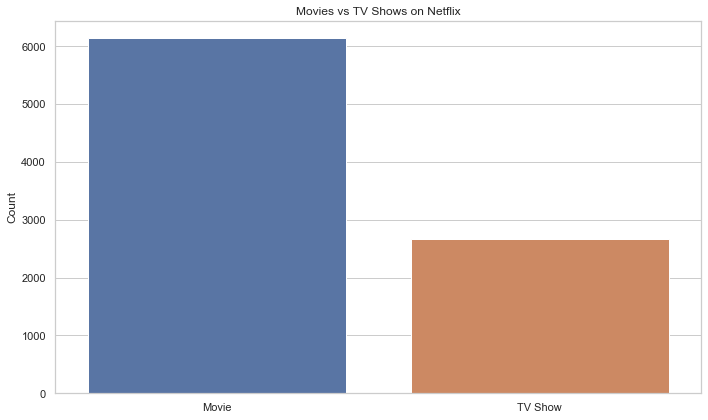

In [148]:
#Movies vs TV Shows

ax = sns.countplot(data=df, x="type")
ax.set_title("Movies vs TV Shows on Netflix")
ax.set_xlabel("")
ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig("images/type_distribution.png", dpi=100)
plt.show()

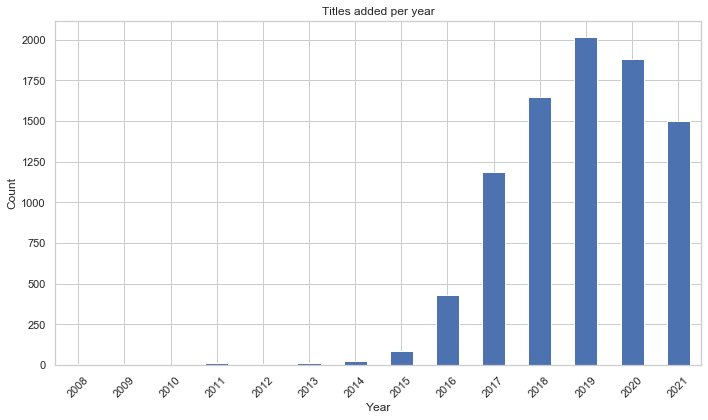

In [149]:
#Titles added per year

year_count = df['year_added'].value_counts().sort_index()
ax = year_count.plot(kind="bar")
ax.set_title("Titles added per year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/titles_per_year.png", dpi=100)
plt.show()


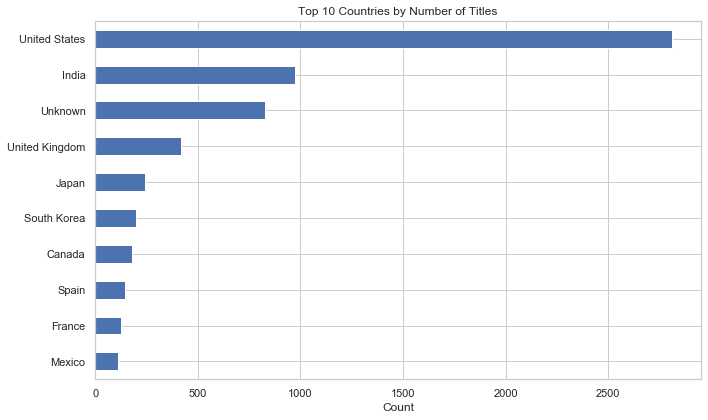

In [150]:
#Top 10 countries

top_countries = df['country'].value_counts().head(10)
ax = top_countries.plot(kind="barh")
ax.set_title("Top 10 Countries by Number of Titles")
ax.set_xlabel("Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("images/top_countries.png", dpi=100)
plt.show()


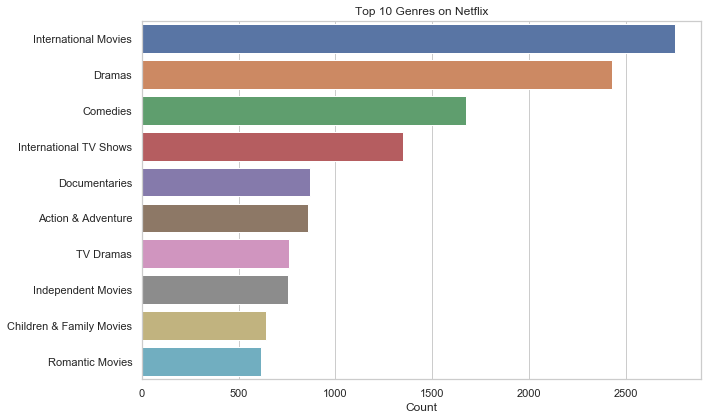

In [151]:
#Top 10 genres (from listed_in)
genres_split = df['listed_in'].str.split(', ')
flat = [g for sub in genres_split for g in sub]
top_gen = Counter(flat).most_common(10)

labels, counts = zip(*top_gen)
ax = sns.barplot(x=list(counts), y=list(labels))
ax.set_title("Top 10 Genres on Netflix")
ax.set_xlabel("Count")
ax.set_ylabel("")
plt.tight_layout()
plt.savefig("images/top_genres.png", dpi=100)
plt.show()


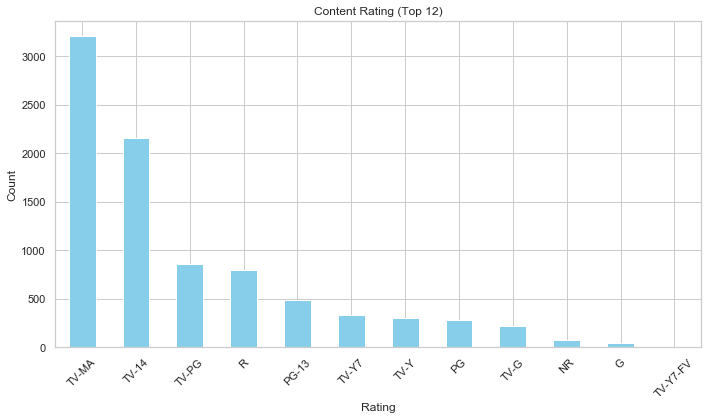

In [153]:
#Ratings Distribution

ax=df['rating'].value_counts().head(12).plot(kind = "bar", color='skyblue')
ax.set_title("Content Rating (Top 12)")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/ratings_distribution.png", dpi=300)
plt.show()


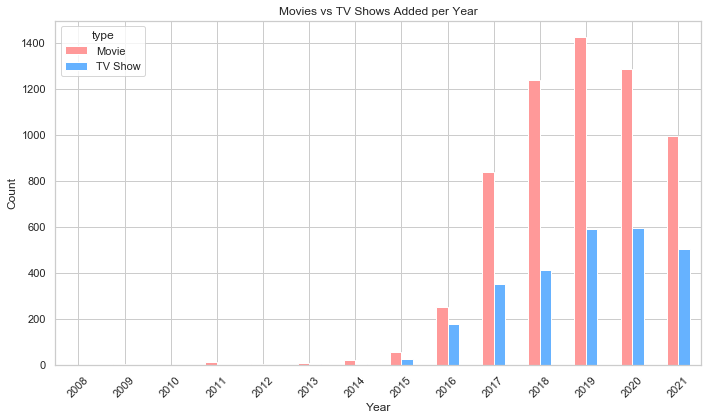

In [154]:
#Movies vs TV Shows Trend Over Time
pivot = df.pivot_table(index='year_added', columns='type', values='show_id', aggfunc='count').fillna(0)

ax=pivot.plot(kind='bar', stacked=False, figsize=(10,6), color=['#FF9999','#66B2FF'])
ax.set_title("Movies vs TV Shows Added per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/movies_vs_tv_by_year.png", dpi=300)
plt.show()                    

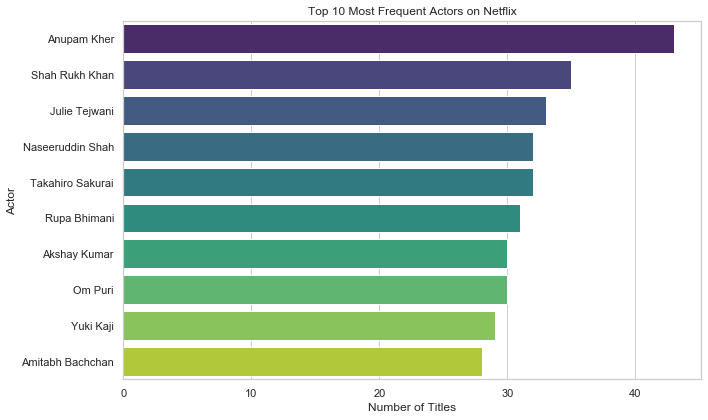

In [155]:
#Top 10 Most Frequent Actors

#drop NaN from cast
cast_data = df['cast'].dropna().str.split(', ')

actors_flat = [actor for sublist in cast_data for actor in sublist]

from collections import Counter
top_actors = Counter(actors_flat).most_common(10)

#convert to dataframe for plotting
actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])

sns.barplot(x='Count', y='Actor', data=actors_df, palette='viridis')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.tight_layout()
plt.savefig("images/top_actors.png", dpi=300)
plt.show()


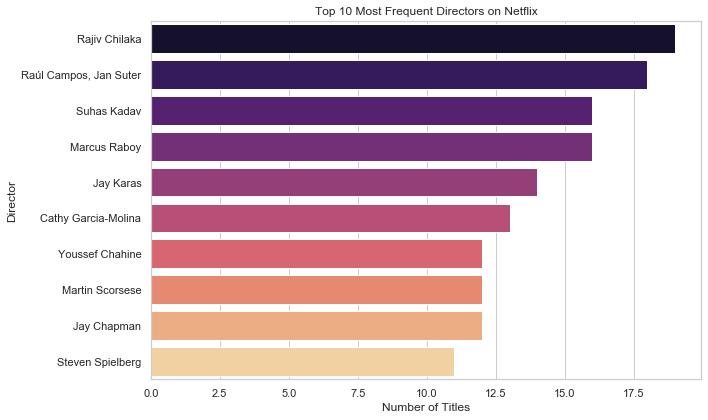

In [156]:
#Top 10 Most Frequent Directors
director_data = df['director'].dropna()

top_directors = Counter(director_data).most_common(10)

directors_df = pd.DataFrame(top_directors, columns=['Director', 'Count'])

sns.barplot(x='Count', y='Director', data=directors_df, palette='magma')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.savefig("images/top_directors.png", dpi=300)
plt.show()

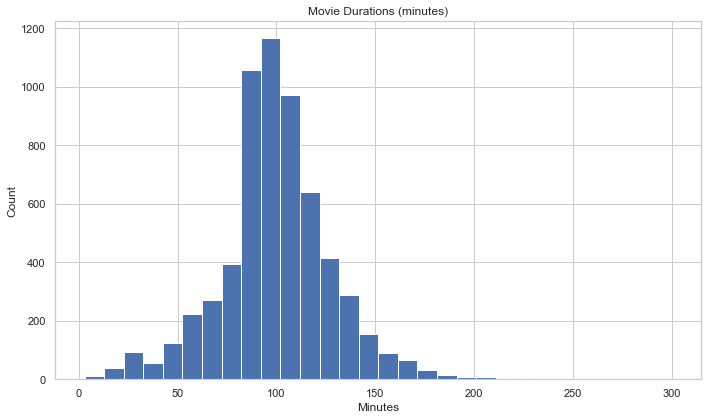

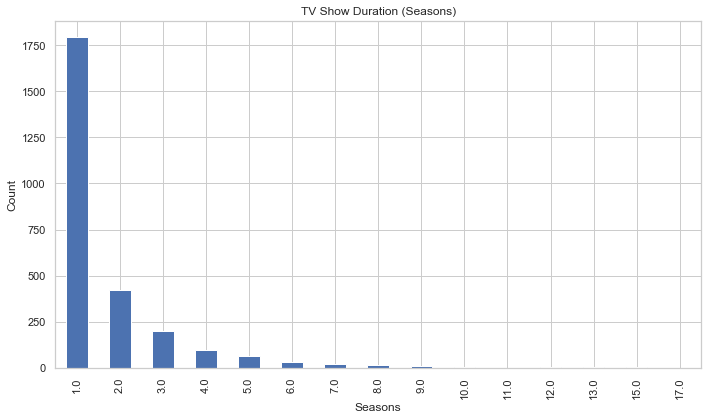

In [157]:
#Duration insights (minutes vs seasons)

#create normalized columns for duration type and numeric value
tmp = df['duration'].str.extract(r'(?P<num>\d+)\s*(?P<unit>\w+)')
tmp['num'] = pd.to_numeric(tmp['num'], errors='coerce')
df['duration_value'] = tmp['num']
df['duration_unit'] = tmp['unit'].str.lower()

#Movies: minutes distribution 
movie_minutes = df.loc[df['type'] == 'Movie', 'duration_value'].dropna().clip(upper=300)
ax = movie_minutes.plot(kind='hist', bins=30)
ax.set_title('Movie Durations (minutes)')
ax.set_xlabel('Minutes')
ax.set_ylabel('Count')
plt.tight_layout()
plt.savefig('images/movie_duration_hist.png', dpi=300)
plt.show()

#TV Shows: seasons distribution
tv_seasons = df.loc[df['type'] == 'TV Show', 'duration_value'].dropna()
ax = tv_seasons.value_counts().sort_index().plot(kind='bar')
ax.set_title('TV Show Duration (Seasons)')
ax.set_xlabel('Seasons')
ax.set_ylabel('Count')
plt.tight_layout()
plt.savefig('images/tv_seasons_bar.png', dpi=300)
plt.show()


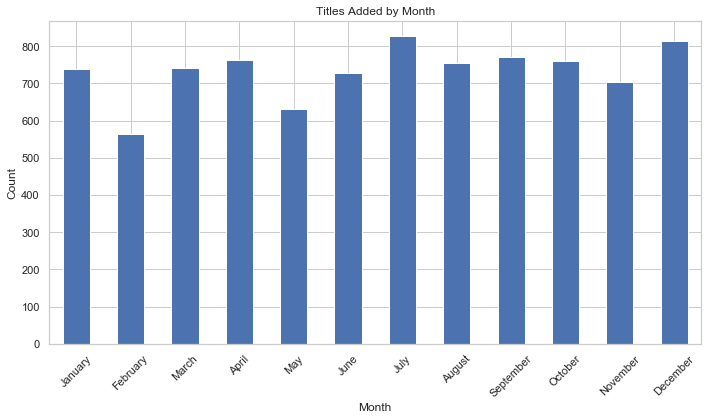

In [159]:
#Seasonality: titles added by month

# Order months for nicer plotting
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

month_counts = (df['month_added']
                .value_counts()
                .reindex(month_order))

ax = month_counts.plot(kind='bar')
ax.set_title('Titles Added by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/titles_by_month.png', dpi=300)
plt.show()


## Conclusion

From analyzing the Netflix dataset, I found:

1. **Content Mix:** Movies make up the majority of the catalog, but TV shows have grown steadily in recent years.
2. **Growth Trend:** A sharp increase in titles added occurred after 2015, aligning with Netflix's global expansion and original content strategy.
3. **Top Genres:** International Movies, Dramas, and Comedies are the most represented genres.
4. **Geography:** The United States dominates content production, followed by India and the UK.
5. **Ratings:** TV-MA is the most common rating, indicating a focus on mature audiences.
6. **Duration Patterns:** Most movies fall between 80–120 minutes; TV shows are typically 1–2 seasons long.
7. **Key Contributors:** Certain actors and directors appear frequently, reflecting recurring collaborations.

**Overall**, Netflix's catalog has evolved from a US-centric movie collection to a globally diverse platform with significant growth in TV series and original content after 2015.
